In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, re
from numpy import genfromtxt
from PIL import Image, ImageFilter

In [2]:
data_dir = './data/'

  Subject  Condition  Threshold  Efficiency
0    5555       Real   0.425017    0.026372
1     joe       Real   0.173922    0.064447
2     joe  Schematic   0.017367    0.224969
3   ideal       Real   0.011209    1.000000
4   ideal  Schematic   0.003907    1.000000


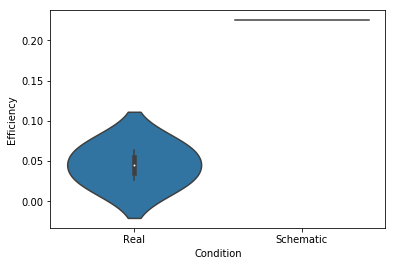

In [45]:
sub_re = re.compile(r'^(.+)_Face-Threshold.*threshold.csv')
data_files = os.listdir(data_dir)
thresholds = []
ideal_threshold = {}
conditions = []
subjects =[]
for fname in data_files :
    subject = sub_re.findall(fname)
    if len(subject) > 0 :
        subject = subject[0]
        dat = pd.read_csv(data_dir + fname)
        condition = dat['Face'][0]
        thresholds.append(np.abs(dat['Threshold'][0]))
        subjects.append(subject)
        conditions.append(condition)
        if subject == 'ideal':
            ideal_threshold[condition] = dat['Threshold'][0]
efficiencies = np.zeros(len(thresholds))
for i in range(len(thresholds)):
    efficiencies[i] = ideal_threshold[conditions[i]] / thresholds[i]
results = pd.DataFrame({'Subject':subjects, 'Condition':conditions, 'Threshold':thresholds,
                        'Efficiency' : efficiencies})    
human = results[results['Subject'] != 'ideal']
sns.violinplot( y=human["Efficiency"], x=human["Condition"])
print(results)
#results.to_csv('Face-Threshold_results.csv')

In [48]:
subci_re = re.compile(r'^(.+)_Face.*_classificationImage.*csv')
data_files = os.listdir(data_dir)
subjects =[]
n = {'Real': 0, 'Schematic': 0}
cix = {'Real': np.zeros([210,140]), 'Schematic': np.zeros([263,263])}
for fname in data_files :
    subject = subci_re.findall(fname)
    if len(subject) > 0 :
        print(subject[0])
        if subject[0] == 'ideal' :
            ci = genfromtxt(data_dir + fname, delimiter=',')
            ci = ci + np.abs(np.min(ci))
            ci = ci * (255 / np.max(ci))
            ci = np.floor(ci)
            ci_image = Image.fromarray(ci).convert('L')
            ci_image.show()
            ci_smooth = ci_image.filter(ImageFilter.GaussianBlur(4))
            ci_smooth.show()
            ci_threshold = np.array(ci_smooth)
            lb = np.quantile(ci_threshold, .025)
            ub = np.quantile(ci_threshold, .97)
            ci_threshold[ci_threshold < lb] = 0
            ci_threshold[ci_threshold > ub] = 255
            ci_threshold[np.logical_and(ci_threshold < ub,  ci_threshold > lb)] = 128
            ci_threshold = Image.fromarray(ci_threshold)
            ci_threshold.show()
        else :
            ci = genfromtxt(data_dir + fname, delimiter=',')
            ci = ci + np.abs(np.min(ci))
            ci = ci * (255 / np.max(ci))
            if ci.shape[0] == 263 :
                cix['Schematic'] = cix['Schematic'] + ci
                n['Schematic'] = n['Schematic'] + 1
            else :
                cix['Real'] = cix['Real'] + ci
                n['Real'] = n['Real'] + 1
conditions = ['Real', 'Schematic']                
for i in range(2) :
    cix[conditions[i]] = np.floor(cix[conditions[i]] / n[conditions[i]])
    cix_image = Image.fromarray(cix[conditions[i]]).convert('L')
    cix_image.show()
    cix_smooth = cix_image.filter(ImageFilter.GaussianBlur(4))
    cix_smooth.show()


ideal
ideal
5555


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


In [47]:
fname =  'ideal_Face-ClassificationImage_2019_Mar_17_1816_Schematic_classificationImage.csv'
subject = subci_re.findall(fname)
ci = genfromtxt(data_dir + fname, delimiter=',')
ci = ci + np.abs(np.min(ci))
ci = ci * (255 / np.max(ci))
ci = np.floor(ci)
ci_image = Image.fromarray(ci).convert('L')
ci_image.show()
ci_smooth = ci_image.filter(ImageFilter.GaussianBlur(4))
ci_smooth.show()
#ci_threshold = np.array(ci_smooth)
#lb = np.quantile(ci_threshold, .025)
#ub = np.quantile(ci_threshold, .97)
#ci_threshold[ci_threshold < lb] = 0
#ci_threshold[ci_threshold > ub] = 255
#ci_threshold[np.logical_and(ci_threshold < ub,  ci_threshold > lb)] = 128
#ci_threshold = Image.fromarray(ci_threshold)
#ci_threshold.show()

In [42]:
data_files

['joe_Face-Threshold_2019_Mar_17_1735.csv',
 'ideal_Face-Threshold_2019_Mar_17_1928.psydat',
 'joe_Face-Threshold_2019_Mar_17_1735.log',
 '.DS_Store',
 'ideal_Face-ClassificationImage_2019_Mar_17_1816.csv',
 'ideal_Face-Threshold_2019_Mar_17_1927_threshold.csv',
 'joe_Face-Threshold_2019_Mar_17_1747.psydat',
 'ideal_Face-ClassificationImage_2019_Mar_17_1816.log',
 'ideal_Face-Threshold_2019_Mar_17_1927.csv',
 'ideal_Face-ClassificationImage_2019_Mar_17_1816.psydat',
 '5555_Face-Threshold_2019_Mar_17_1737_threshold.csv',
 'ideal_Face-Threshold_2019_Mar_17_1927.log',
 'ideal_Face-Threshold_2019_Mar_17_1114.csv',
 'joe_Face-Threshold_2019_Mar_17_1747.log',
 'ideal_Face-ClassificationImage_2019_Mar_15_2201_classificationImage.csv',
 'ideal_Face-Threshold_2019_Mar_17_1921.csv',
 'ideal_Face-ClassificationImage_2019_Mar_16_0956.log',
 'ideal_Face-Threshold_2019_Mar_17_1114_threshold.csv',
 'joe_Face-Threshold_2019_Mar_17_1735_threshold.csv',
 'ideal_Face-ClassificationImage_2019_Mar_16_0956.